In [1]:
import xarray as xr

In [2]:
input_era5 = '../data/ERA_59_20_day/era5_1959_day.nc'

In [3]:
ds = xr.open_dataset(input_era5)

In [4]:
ds

<xarray.Dataset>
Dimensions:    (time: 365, latitude: 5, longitude: 18)
Coordinates:
  * time       (time) datetime64[ns] 1959-01-01 1959-01-02 ... 1959-12-31
  * longitude  (longitude) float32 -61.75 -61.5 -61.25 ... -58.0 -57.75 -57.5
  * latitude   (latitude) float32 -61.78 -62.03 -62.28 -62.53 -62.78
Data variables:
    z          (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    ssrd       (time, latitude, longitude) float32 ...
    strd       (time, latitude, longitude) float32 ...
    sf         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...

In [5]:
input_dem = '../data/static/SSI_static_2000_1000.nc'
ds_dem = xr.open_dataset(input_dem)
ds_dem

<xarray.Dataset>
Dimensions:  (lon: 212, lat: 112)
Coordinates:
  * lon      (lon) float64 -61.77 -61.75 -61.73 -61.71 ... -57.59 -57.57 -57.55
  * lat      (lat) float64 -62.86 -62.85 -62.84 -62.83 ... -61.76 -61.75 -61.74
Data variables:
    HGT      (lat, lon) float32 ...
    ASPECT   (lat, lon) float32 ...
    SLOPE    (lat, lon) float32 ...
    MASK     (lat, lon) float32 ...

In [6]:
print(ds_dem['lat'].min().values, ds_dem['lat'].max().values, ds_dem['lon'].min().values, ds_dem['lon'].max().values)
print(ds['latitude'].min().values, ds['latitude'].max().values, ds['longitude'].min().values, ds['longitude'].max().values)

-62.85877739365625 -61.74450625934375 -61.770695142667456 -57.546384694332545
-62.78 -61.78 -61.75 -57.5


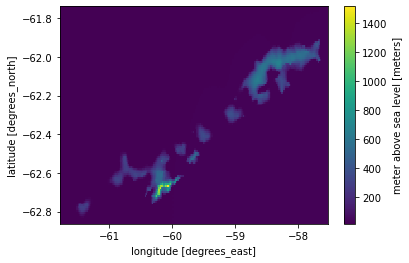

In [7]:
ds_dem['HGT'].plot()

In [8]:
import geopandas as gpd

In [9]:
df = gpd.read_file('../data/static/Shapefiles/SSI_all.shp')

In [10]:
import matplotlib.pyplot as plt

In [11]:
ds_int = ds[['z', 't2m', 'sf']].interp(longitude=ds_dem.lon, latitude=ds_dem.lat, method='nearest', 
kwargs={"fill_value": "extrapolate"})
ds_int

<xarray.Dataset>
Dimensions:    (time: 365, lat: 112, lon: 212)
Coordinates:
  * time       (time) datetime64[ns] 1959-01-01 1959-01-02 ... 1959-12-31
    longitude  (lon) float64 -61.77 -61.75 -61.73 ... -57.59 -57.57 -57.55
    latitude   (lat) float64 -62.86 -62.85 -62.84 ... -61.76 -61.75 -61.74
  * lon        (lon) float64 -61.77 -61.75 -61.73 ... -57.59 -57.57 -57.55
  * lat        (lat) float64 -62.86 -62.85 -62.84 ... -61.76 -61.75 -61.74
Data variables:
    z          (time, lat, lon) float32 109.6 109.6 109.6 ... 232.3 232.3 232.3
    t2m        (time, lat, lon) float32 273.5 273.5 273.5 ... 272.0 272.0 272.0
    sf         (time, lat, lon) float32 0.003634 0.003634 ... 4.774e-05

In [16]:
dem_era5 = ds_int['z'][0].values/9.80665
dem_era5[dem_era5 < 0] = 0
t2m_int = (ds_int['t2m'] + (ds_dem['HGT'].values - dem_era5) * - 0.009) - 273.16


In [17]:
t2m_int

<xarray.DataArray 't2m' (time: 365, lat: 112, lon: 212)>
array([[[ 0.32382202,  0.32382202,  0.32382202, ..., -0.52075195,
         -0.52075195, -0.52075195],
        [ 0.32382202,  0.32382202,  0.32382202, ..., -0.52075195,
         -0.52075195, -0.52075195],
        [ 0.32382202,  0.32382202,  0.32382202, ..., -0.52075195,
         -0.52075195, -0.52075195],
        ...,
        [ 0.8389282 ,  0.8389282 ,  0.8389282 , ...,  0.2374878 ,
          0.2374878 ,  0.2374878 ],
        [ 0.8389282 ,  0.8389282 ,  0.8389282 , ...,  0.2374878 ,
          0.2374878 ,  0.2374878 ],
        [ 0.8389282 ,  0.8389282 ,  0.8389282 , ...,  0.24649048,
          0.2374878 ,  0.2374878 ]],

       [[ 0.87231445,  0.87231445,  0.87231445, ...,  0.276886  ,
          0.276886  ,  0.276886  ],
        [ 0.87231445,  0.87231445,  0.87231445, ...,  0.276886  ,
          0.276886  ,  0.276886  ],
        [ 0.87231445,  0.87231445,  0.87231445, ...,  0.276886  ,
          0.276886  ,  0.276886  ],
...
        [ 0.11090088,  0.11090088,  0.11090088, ..., -0.4732666 ,
         -0.4732666 , -0.4732666 ],
        [ 0.11090088,  0.11090088,  0.11090088, ..., -0.4732666 ,
         -0.4732666 , -0.4732666 ],
        [ 0.11090088,  0.11090088,  0.11090088, ..., -0.46426392,
         -0.4732666 , -0.4732666 ]],

       [[ 0.04180908,  0.04180908,  0.04180908, ..., -1.394928  ,
         -1.394928  , -1.394928  ],
        [ 0.04180908,  0.04180908,  0.04180908, ..., -1.394928  ,
         -1.394928  , -1.394928  ],
        [ 0.04180908,  0.04180908,  0.04180908, ..., -1.394928  ,
         -1.394928  , -1.394928  ],
        ...,
        [ 0.5733032 ,  0.5733032 ,  0.5733032 , ..., -1.0869751 ,
         -1.0869751 , -1.0869751 ],
        [ 0.5733032 ,  0.5733032 ,  0.5733032 , ..., -1.0869751 ,
         -1.0869751 , -1.0869751 ],
        [ 0.5733032 ,  0.5733032 ,  0.5733032 , ..., -1.0779724 ,
         -1.0869751 , -1.0869751 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1959-01-01 1959-01-02 ... 1959-12-31
    longitude  (lon) float64 -61.77 -61.75 -61.73 ... -57.59 -57.57 -57.55
    latitude   (lat) float64 -62.86 -62.85 -62.84 ... -61.76 -61.75 -61.74
  * lon        (lon) float64 -61.77 -61.75 -61.73 ... -57.59 -57.57 -57.55
  * lat        (lat) float64 -62.86 -62.85 -62.84 ... -61.76 -61.75 -61.74

In [18]:
ppd_int = t2m_int.copy()
ppd_int

<xarray.DataArray 't2m' (time: 365, lat: 112, lon: 212)>
array([[[ 0.32382202,  0.32382202,  0.32382202, ..., -0.52075195,
         -0.52075195, -0.52075195],
        [ 0.32382202,  0.32382202,  0.32382202, ..., -0.52075195,
         -0.52075195, -0.52075195],
        [ 0.32382202,  0.32382202,  0.32382202, ..., -0.52075195,
         -0.52075195, -0.52075195],
        ...,
        [ 0.8389282 ,  0.8389282 ,  0.8389282 , ...,  0.2374878 ,
          0.2374878 ,  0.2374878 ],
        [ 0.8389282 ,  0.8389282 ,  0.8389282 , ...,  0.2374878 ,
          0.2374878 ,  0.2374878 ],
        [ 0.8389282 ,  0.8389282 ,  0.8389282 , ...,  0.24649048,
          0.2374878 ,  0.2374878 ]],

       [[ 0.87231445,  0.87231445,  0.87231445, ...,  0.276886  ,
          0.276886  ,  0.276886  ],
        [ 0.87231445,  0.87231445,  0.87231445, ...,  0.276886  ,
          0.276886  ,  0.276886  ],
        [ 0.87231445,  0.87231445,  0.87231445, ...,  0.276886  ,
          0.276886  ,  0.276886  ],
...
        [ 0.11090088,  0.11090088,  0.11090088, ..., -0.4732666 ,
         -0.4732666 , -0.4732666 ],
        [ 0.11090088,  0.11090088,  0.11090088, ..., -0.4732666 ,
         -0.4732666 , -0.4732666 ],
        [ 0.11090088,  0.11090088,  0.11090088, ..., -0.46426392,
         -0.4732666 , -0.4732666 ]],

       [[ 0.04180908,  0.04180908,  0.04180908, ..., -1.394928  ,
         -1.394928  , -1.394928  ],
        [ 0.04180908,  0.04180908,  0.04180908, ..., -1.394928  ,
         -1.394928  , -1.394928  ],
        [ 0.04180908,  0.04180908,  0.04180908, ..., -1.394928  ,
         -1.394928  , -1.394928  ],
        ...,
        [ 0.5733032 ,  0.5733032 ,  0.5733032 , ..., -1.0869751 ,
         -1.0869751 , -1.0869751 ],
        [ 0.5733032 ,  0.5733032 ,  0.5733032 , ..., -1.0869751 ,
         -1.0869751 , -1.0869751 ],
        [ 0.5733032 ,  0.5733032 ,  0.5733032 , ..., -1.0779724 ,
         -1.0869751 , -1.0869751 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1959-01-01 1959-01-02 ... 1959-12-31
    longitude  (lon) float64 -61.77 -61.75 -61.73 ... -57.59 -57.57 -57.55
    latitude   (lat) float64 -62.86 -62.85 -62.84 ... -61.76 -61.75 -61.74
  * lon        (lon) float64 -61.77 -61.75 -61.73 ... -57.59 -57.57 -57.55
  * lat        (lat) float64 -62.86 -62.85 -62.84 ... -61.76 -61.75 -61.74

In [24]:
ppd_int = t2m_int.where(t2m_int >= 0, 0)     
ppd_int


<xarray.DataArray 't2m' (time: 365, lat: 112, lon: 212)>
array([[[0.32382202, 0.32382202, 0.32382202, ..., 0.        ,
         0.        , 0.        ],
        [0.32382202, 0.32382202, 0.32382202, ..., 0.        ,
         0.        , 0.        ],
        [0.32382202, 0.32382202, 0.32382202, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.8389282 , 0.8389282 , 0.8389282 , ..., 0.2374878 ,
         0.2374878 , 0.2374878 ],
        [0.8389282 , 0.8389282 , 0.8389282 , ..., 0.2374878 ,
         0.2374878 , 0.2374878 ],
        [0.8389282 , 0.8389282 , 0.8389282 , ..., 0.24649048,
         0.2374878 , 0.2374878 ]],

       [[0.87231445, 0.87231445, 0.87231445, ..., 0.276886  ,
         0.276886  , 0.276886  ],
        [0.87231445, 0.87231445, 0.87231445, ..., 0.276886  ,
         0.276886  , 0.276886  ],
        [0.87231445, 0.87231445, 0.87231445, ..., 0.276886  ,
         0.276886  , 0.276886  ],
...
        [0.11090088, 0.11090088, 0.11090088, ..., 0.        ,
         0.        , 0.        ],
        [0.11090088, 0.11090088, 0.11090088, ..., 0.        ,
         0.        , 0.        ],
        [0.11090088, 0.11090088, 0.11090088, ..., 0.        ,
         0.        , 0.        ]],

       [[0.04180908, 0.04180908, 0.04180908, ..., 0.        ,
         0.        , 0.        ],
        [0.04180908, 0.04180908, 0.04180908, ..., 0.        ,
         0.        , 0.        ],
        [0.04180908, 0.04180908, 0.04180908, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.5733032 , 0.5733032 , 0.5733032 , ..., 0.        ,
         0.        , 0.        ],
        [0.5733032 , 0.5733032 , 0.5733032 , ..., 0.        ,
         0.        , 0.        ],
        [0.5733032 , 0.5733032 , 0.5733032 , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1959-01-01 1959-01-02 ... 1959-12-31
    longitude  (lon) float64 -61.77 -61.75 -61.73 ... -57.59 -57.57 -57.55
    latitude   (lat) float64 -62.86 -62.85 -62.84 ... -61.76 -61.75 -61.74
  * lon        (lon) float64 -61.77 -61.75 -61.73 ... -57.59 -57.57 -57.55
  * lat        (lat) float64 -62.86 -62.85 -62.84 ... -61.76 -61.75 -61.74

In [25]:
ppd_int = ppd_int.resample(time='1MS').sum()
ppd_int


<xarray.DataArray 't2m' (time: 12, lat: 112, lon: 212)>
array([[[23.251587  , 23.251587  , 23.251587  , ...,  7.00943   ,
          7.00943   ,  7.00943   ],
        [23.251587  , 23.251587  , 23.251587  , ...,  7.00943   ,
          7.00943   ,  7.00943   ],
        [23.251587  , 23.251587  , 23.251587  , ...,  7.00943   ,
          7.00943   ,  7.00943   ],
        ...,
        [35.540314  , 35.540314  , 35.540314  , ..., 29.44925   ,
         29.44925   , 29.44925   ],
        [35.540314  , 35.540314  , 35.540314  , ..., 29.44925   ,
         29.44925   , 29.44925   ],
        [35.540314  , 35.540314  , 35.540314  , ..., 29.710327  ,
         29.44925   , 29.44925   ]],

       [[ 8.1918335 ,  8.1918335 ,  8.1918335 , ...,  0.1716919 ,
          0.1716919 ,  0.1716919 ],
        [ 8.1918335 ,  8.1918335 ,  8.1918335 , ...,  0.1716919 ,
          0.1716919 ,  0.1716919 ],
        [ 8.1918335 ,  8.1918335 ,  8.1918335 , ...,  0.1716919 ,
          0.1716919 ,  0.1716919 ],
...
        [ 0.04766846,  0.04766846,  0.04766846, ...,  0.3866577 ,
          0.3866577 ,  0.3866577 ],
        [ 0.04766846,  0.04766846,  0.04766846, ...,  0.3866577 ,
          0.3866577 ,  0.3866577 ],
        [ 0.04766846,  0.04766846,  0.04766846, ...,  0.4046631 ,
          0.3866577 ,  0.3866577 ]],

       [[ 3.427246  ,  3.427246  ,  3.427246  , ...,  0.79800415,
          0.79800415,  0.79800415],
        [ 3.427246  ,  3.427246  ,  3.427246  , ...,  0.79800415,
          0.79800415,  0.79800415],
        [ 3.427246  ,  3.427246  ,  3.427246  , ...,  0.79800415,
          0.79800415,  0.79800415],
        ...,
        [13.939087  , 13.939087  , 13.939087  , ...,  5.3623962 ,
          5.3623962 ,  5.3623962 ],
        [13.939087  , 13.939087  , 13.939087  , ...,  5.3623962 ,
          5.3623962 ,  5.3623962 ],
        [13.939087  , 13.939087  , 13.939087  , ...,  5.452423  ,
          5.3623962 ,  5.3623962 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 1959-12-01
    longitude  (lon) float64 -61.77 -61.75 -61.73 ... -57.59 -57.57 -57.55
    latitude   (lat) float64 -62.86 -62.85 -62.84 ... -61.76 -61.75 -61.74
  * lon        (lon) float64 -61.77 -61.75 -61.73 ... -57.59 -57.57 -57.55
  * lat        (lat) float64 -62.86 -62.85 -62.84 ... -61.76 -61.75 -61.74

In [22]:
ppd_int

array([[[23.251587  , 23.251587  , 23.251587  , ...,  7.00943   ,
          7.00943   ,  7.00943   ],
        [23.251587  , 23.251587  , 23.251587  , ...,  7.00943   ,
          7.00943   ,  7.00943   ],
        [23.251587  , 23.251587  , 23.251587  , ...,  7.00943   ,
          7.00943   ,  7.00943   ],
        ...,
        [35.540314  , 35.540314  , 35.540314  , ..., 29.44925   ,
         29.44925   , 29.44925   ],
        [35.540314  , 35.540314  , 35.540314  , ..., 29.44925   ,
         29.44925   , 29.44925   ],
        [35.540314  , 35.540314  , 35.540314  , ..., 29.710327  ,
         29.44925   , 29.44925   ]],

       [[ 8.1918335 ,  8.1918335 ,  8.1918335 , ...,  0.1716919 ,
          0.1716919 ,  0.1716919 ],
        [ 8.1918335 ,  8.1918335 ,  8.1918335 , ...,  0.1716919 ,
          0.1716919 ,  0.1716919 ],
        [ 8.1918335 ,  8.1918335 ,  8.1918335 , ...,  0.1716919 ,
          0.1716919 ,  0.1716919 ],
        ...,
        [20.608826  , 20.608826  , 20.608826  , ...,  

<AxesSubplot:title={'center':'time = 1959-01-11'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

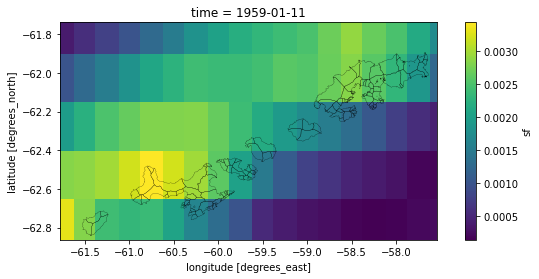

In [14]:
f, ax1 = plt.subplots(1, 1, figsize=(10, 4))
ds_int['sf'][10].plot(ax=ax1)
df.boundary.plot(ax=ax1, edgecolor='black', linewidth=0.2)